# Safety Dataset EDA and Modeling
by Prince Joseph Erneszer Javier

## Executive Summary

## Introduction

## About the Data

## Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pickle
import ast

from collections import Counter
from scipy.stats import kurtosis, skew
from scipy.signal import periodogram
import multiprocessing


# loading packages
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, accuracy_score

import warnings
warnings.simplefilter('ignore')

n_jobs = multiprocessing.cpu_count()

### Loading the Data

In [2]:
# check the dataset folders
!ls data/safety/

data_dictionary.xlsx  features	labels


In [3]:
# read the data dictionary
xl = pd.ExcelFile("data/safety/data_dictionary.xlsx")

In [4]:
# sheet names
xl.sheet_names

['telematics data', 'labels']

In [47]:
# let's see the first sheet
xl.parse('telematics data')

,Unnamed: 0,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,description,trip id,accuracy inferred by GPS in meters,GPS bearing,accelerometer reading in x axis (m/s2),accelerometer reading in y axis (m/s2),accelerometer reading in z axis (m/s2),gyroscope reading in x axis (rad/s),gyroscope reading in y axis (rad/s),gyroscope reading in z axis (rad/s),time of the record by number of seconds,speed measured by GPS in m/s
1,samples,1,5,303.695,-0.00636292,-0.393829,-0.922379,"-0.020000606102604086,0.03205247529964867,-0.0...",NaN,NaN,0,0.57
2,NaN,1,10,325.39,0.183914,-0.355026,-0.92041,"-0.028598887998033916,0.025720543491876274,-0....",NaN,NaN,1,0.28
3,NaN,1,5,303.695,-0.00636292,-0.392944,-0.922226,"-0.01894040167264354,0.030980020328673762,-0.0...",NaN,NaN,2,0.57
4,NaN,1,10,324.23,0.165924,-0.332092,-0.920578,"-0.0577245492596855,0.002558232543130116,0.014...",NaN,NaN,3,0.28
5,NaN,1,5,303.695,-0.00642395,-0.392166,-0.924164,"-0.017865283540578553,0.03203915949419828,-0.0...",NaN,NaN,4,0.57
6,NaN,1,10,324.23,0.169724,-0.333694,-0.939575,"-0.04030587783391324,0.03112276576310201,-0.00...",NaN,NaN,5,0.28
7,NaN,1,5,303.695,-0.00480652,-0.391861,-0.923065,"-0.020006731373111267,0.03205726898961082,-0.0...",NaN,NaN,6,0.57
8,NaN,2,10,322.99,0.174759,-0.344498,-0.918839,"-0.00411618178082647,0.02562493600874243,0.004...",NaN,NaN,0,0.28
9,NaN,2,5,303.695,-0.00646973,-0.391953,-0.923889,"-0.0189390700920985,0.032050611086885616,-0.00...",NaN,NaN,1,0.57


In [46]:
# let's see the second sheet
xl.parse('labels')

,bookingID,label
0,1,1
1,2,0
2,3,0
3,4,0
4,5,1
5,6,1
6,7,1
7,8,1
8,9,0
9,10,0


In [7]:
# let's see the contents of features and labels folder
!ls data/safety/features

# there are many csvs, we either want to run this in Pyspark 
# or we can combine them into just one Pandas dataset

part-00000-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
part-00001-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
part-00002-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
part-00003-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
part-00004-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
part-00005-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
part-00006-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
part-00007-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
part-00008-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
part-00009-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv


In [8]:
!ls data/safety/labels

part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv


In [2]:
# let's load one features csv, there are many csvs we either
_ = pd.read_csv("data/safety/features/part-00000-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
_.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1202590843006,3.000,353.0,1.228867,8.900100,3.986968,0.008221,0.002269,-0.009966,1362.0,0.000000
1,274877907034,9.293,17.0,0.032775,8.659933,4.737300,0.024629,0.004028,-0.010858,257.0,0.190000
2,884763263056,3.000,189.0,1.139675,9.545974,1.951334,-0.006899,-0.015080,0.001122,973.0,0.667059
3,1073741824054,3.900,126.0,3.871543,10.386364,-0.136474,0.001344,-0.339601,-0.017956,902.0,7.913285
4,1056561954943,3.900,50.0,-0.112882,10.550960,-1.560110,0.130568,-0.061697,0.161530,820.0,20.419409


In [95]:
# let's load the labels csv
labels = pd.read_csv("data/safety/labels/part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv")

# drop duplicates
labels = labels.dropna()

# sort
labels.sort_values(by="bookingID", inplace=True)
labels.reset_index(drop=True, inplace=True)

labels.head()

,bookingID,label
0,0,0
1,1,1
2,2,1
3,4,1
4,6,0


In [11]:
# how many null
labels.isnull().sum()

bookingID    0
label        0
dtype: int64

In [12]:
# how many labels are there?
len(labels)

20018

In [13]:
# how many unique bookings are there?
len(labels.bookingID.unique())

20000

In [14]:
# load all paths into list
paths = glob.glob("data/safety/features/*.csv")

# let's combine all feature into one pandas dataframe
df_feats0 = pd.DataFrame()

for path in paths:
    _ = pd.read_csv(path, header="infer")
    df_feats0 = pd.concat([df_feats0, _])

In [15]:
df_feats0.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1657857376413,10.000,128.234833,0.780280,-9.869086,-0.019440,-0.143924,-0.016662,-0.016986,497.0,16.030001
1,25769803913,6.000,286.368225,9.086713,0.309390,-3.506772,0.008518,-0.006350,0.003299,120.0,2.089626
2,1434519076946,12.136,339.000000,0.946808,9.609665,2.311615,-0.011124,-0.320435,-0.062027,76.0,5.540000
3,283467841697,3.000,186.000000,0.900247,7.996878,5.286559,0.000874,-0.009702,0.020248,22.0,0.276720
4,481036337236,3.090,18.000000,0.045000,9.882000,0.173000,0.038839,-0.284030,-0.078576,1522.0,1.306365


In [16]:
df_feats0.shape

(16135561, 11)

In [17]:
# drop duplicates
df_feats0 = df_feats0.drop_duplicates()

In [18]:
# count null values
df_feats0.isnull().sum()

bookingID         0
Accuracy          0
Bearing           0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
second            0
Speed             0
dtype: int64

In [19]:
# since there is only one label per bookingID, we engineer features per booking trip
# min, max, mean, std, skewness, kurtosis, length_of_trip, 

# sorting by booking number and seconds
df_feats0 = df_feats0.sort_values(by=["bookingID", "second"]).reset_index(drop=True)
df_feats0.head()

# save to csv df_feats0
df_feats0.to_csv("data/processed/df_feats0.csv", index=False)

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,0,12.0,143.298294,0.818112,-9.941461,-2.014999,-0.016245,-0.094040,0.070732,0.0,3.442991
1,0,8.0,143.298294,0.546405,-9.835590,-2.038925,-0.047092,-0.078874,0.043187,1.0,0.228454
2,0,8.0,143.298294,-1.706207,-9.270792,-1.209448,-0.028965,-0.032652,0.015390,2.0,0.228454
3,0,8.0,143.298294,-1.416705,-9.548032,-1.860977,-0.022413,0.005049,-0.025753,3.0,0.228454
4,0,8.0,143.298294,-0.598145,-9.853534,-1.378574,-0.014297,-0.046206,0.021902,4.0,0.228454


In [12]:
# load csv
df_feats0 = pd.read_csv("data/processed/df_feats0.csv")
df_feats0.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,0,12.0,143.298294,0.818112,-9.941461,-2.014999,-0.016245,-0.094040,0.070732,0.0,3.442991
1,0,8.0,143.298294,0.546405,-9.835590,-2.038925,-0.047092,-0.078874,0.043187,1.0,0.228454
2,0,8.0,143.298294,-1.706207,-9.270792,-1.209448,-0.028965,-0.032652,0.015390,2.0,0.228454
3,0,8.0,143.298294,-1.416705,-9.548032,-1.860977,-0.022413,0.005049,-0.025753,3.0,0.228454
4,0,8.0,143.298294,-0.598145,-9.853534,-1.378574,-0.014297,-0.046206,0.021902,4.0,0.228454


In [262]:
# setting aside test data 5% of all booking IDs
num_test = int(len(df_feats0.bookingID.unique()) * 0.05)
print(num_test)

# select random booking IDs
test_bookingIDs = np.random.choice(df_feats0.bookingID.unique(), num_test, replace=False)
train_bookingIDs = [i for i in df_feats0.bookingID.unique() if i not in test_bookingIDs]
df_test = df_feats0[df_feats0.bookingID.isin(test_bookingIDs)]
df_train = df_feats0[df_feats0.bookingID.isin(train_bookingIDs)]

1000


In [275]:
# save to csv df_test
df_test.to_csv("data/processed/df_test.csv", index=False)
df_train.to_csv("data/processed/df_train.csv", index=False)

In [2]:
# load csv
df_test = pd.read_csv("data/processed/df_test.csv")
df_train = pd.read_csv("data/processed/df_train.csv")

In [5]:
df_train.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,0,12.0,143.298294,0.818112,-9.941461,-2.014999,-0.016245,-0.094040,0.070732,0.0,3.442991
1,0,8.0,143.298294,0.546405,-9.835590,-2.038925,-0.047092,-0.078874,0.043187,1.0,0.228454
2,0,8.0,143.298294,-1.706207,-9.270792,-1.209448,-0.028965,-0.032652,0.015390,2.0,0.228454
3,0,8.0,143.298294,-1.416705,-9.548032,-1.860977,-0.022413,0.005049,-0.025753,3.0,0.228454
4,0,8.0,143.298294,-0.598145,-9.853534,-1.378574,-0.014297,-0.046206,0.021902,4.0,0.228454


In [6]:
df_test.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,124,3.291,235.0,0.644974,8.789276,1.732346,-0.037781,-0.046967,-0.021515,0.0,1.03
1,124,3.215,235.0,0.772400,9.392273,1.929749,0.015366,0.005249,0.023987,1.0,1.36
2,124,3.179,233.0,0.864517,9.772736,1.314194,0.014740,0.028168,0.082626,2.0,1.95
3,124,3.656,231.0,0.679672,8.870636,2.176208,0.001312,-0.012146,0.026428,3.0,3.23
4,124,3.905,231.0,0.381775,9.333649,1.790970,0.015671,0.013809,0.008408,4.0,3.83


In [88]:
def dominant_f(y):
    """Given time series y, get frequency of maximum power
    from periodogram"""
    f, p = periodogram(y, scaling='spectrum')
    ind = np.argsort(p)
    f_max = f[ind[-1]]
    return f_max

def max_power(y):
    """Given time series y, get maximum power"""
    f, p = periodogram(y, scaling='spectrum')
    return p.max()

In [89]:
# we engineer feature, aggregating feature values per bookingID
# getting min, max, range, mean, std, skewness, and kurtosis, dominant fft freq, and max fft power

df_engg_feats = df_train.drop("second", axis=1)
df_engg_feats = df_engg_feats.groupby(by="bookingID", as_index=True).agg([np.min, np.max, np.ptp, np.mean, np.std, skew, kurtosis, dominant_f, max_power])
df_engg_feats.head()


Accuracy                                                           \
              amin    amax     ptp       mean       std      skew  kurtosis   
bookingID                                                                     
0              4.0  48.000  44.000  10.165339  3.855898  1.732696  8.764958   
1              3.0   7.709   4.709   3.718763  0.597933  1.259239  5.437314   
2              3.0   8.000   5.000   3.930626  1.117354  1.325234  0.930249   
4             10.0  10.000   0.000  10.000000  0.000000  0.000000 -3.000000   
6              3.0  12.000   9.000   4.586721  1.329545  1.697510  5.095780   

                                 Bearing  ...    gyro_z Speed             \
          dominant_f max_power      amin  ... max_power  amin       amax   
bookingID                                 ...                              
0           0.000996  5.347346  0.037464  ...  0.000046  -1.0  22.946083   
1           0.007051  0.039890  0.000000  ...  0.000029  -1.0  21.882141   
2           0.005128  0.350277  1.000000  ...  0.000060   0.0   9.360483   
4           0.500000  0.000000  2.271227  ...  0.000089   0.0  19.780001   
6           0.000913  0.136522  0.000000  ...  0.000034   0.0  16.394695   

                                                                         \
                 ptp      mean       std      skew  kurtosis dominant_f   
bookingID                                                                 
0          23.946083  8.994822  7.199919  0.167588 -1.431322   0.000996   
1          22.882141  7.881588  7.059362  0.347213 -1.243763   0.002350   
2           9.360483  3.157213  2.897762  0.407362 -1.068416   0.005128   
4          19.780001  6.150996  5.595901  0.872207 -0.638173   0.000914   
6          16.394695  4.628921  5.314844  0.723716 -1.001236   0.000913   

                      
           max_power  
bookingID             
0          28.890331  
1          13.413249  
2           3.952531  
4           9.145061  
6           9.048749  

[5 rows x 81 columns]

In [90]:
# flatten column names
cols = [df_engg_feats.columns[i][0]+"_"+df_engg_feats.columns[i][1] for i in range(len(df_engg_feats.columns))]
cols[:5]

['Accuracy_amin',
 'Accuracy_amax',
 'Accuracy_ptp',
 'Accuracy_mean',
 'Accuracy_std']

In [91]:
df_engg_feats.columns = cols
df_engg_feats.reset_index(inplace=True)
df_engg_feats.head()

,bookingID,Accuracy_amin,Accuracy_amax,Accuracy_ptp,Accuracy_mean,Accuracy_std,Accuracy_skew,Accuracy_kurtosis,Accuracy_dominant_f,Accuracy_max_power,...,gyro_z_max_power,Speed_amin,Speed_amax,Speed_ptp,Speed_mean,Speed_std,Speed_skew,Speed_kurtosis,Speed_dominant_f,Speed_max_power
0,0,4.0,48.000,44.000,10.165339,3.855898,1.732696,8.764958,0.000996,5.347346,...,0.000046,-1.0,22.946083,23.946083,8.994822,7.199919,0.167588,-1.431322,0.000996,28.890331
1,1,3.0,7.709,4.709,3.718763,0.597933,1.259239,5.437314,0.007051,0.039890,...,0.000029,-1.0,21.882141,22.882141,7.881588,7.059362,0.347213,-1.243763,0.002350,13.413249
2,2,3.0,8.000,5.000,3.930626,1.117354,1.325234,0.930249,0.005128,0.350277,...,0.000060,0.0,9.360483,9.360483,3.157213,2.897762,0.407362,-1.068416,0.005128,3.952531
3,4,10.0,10.000,0.000,10.000000,0.000000,0.000000,-3.000000,0.500000,0.000000,...,0.000089,0.0,19.780001,19.780001,6.150996,5.595901,0.872207,-0.638173,0.000914,9.145061
4,6,3.0,12.000,9.000,4.586721,1.329545,1.697510,5.095780,0.000913,0.136522,...,0.000034,0.0,16.394695,16.394695,4.628921,5.314844,0.723716,-1.001236,0.000913,9.048749


In [92]:
# add length of each trip
df_len = df_train.groupby(by="bookingID", as_index=True).agg(len).iloc[:, 0:1]
df_len.columns = ['trip_len']
df_len.reset_index(inplace=True)
df_len.head()

,bookingID,trip_len
0,0,1004.0
1,1,851.0
2,2,195.0
3,4,1094.0
4,6,1095.0


In [440]:
# # add approximate entropy
# def ApEn(U):
#     """Given time series data U
#     Return approximate entropy or the irregularity in the time series data
#     per booking"""
    
#     m = 2
#     r = 3

#     def _maxdist(x_i, x_j):
#         return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

#     def _phi(m):
#         x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
#         C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
#         return (N - m + 1.0)**(-1) * sum(np.log(C))

#     N = len(U)

#     return abs(_phi(m+1) - _phi(m))

In [93]:
# merge along bookingID
df_engg_feats_2 = pd.merge(df_engg_feats, df_len, how="inner", on="bookingID")
df_engg_feats_2.head()

,bookingID,Accuracy_amin,Accuracy_amax,Accuracy_ptp,Accuracy_mean,Accuracy_std,Accuracy_skew,Accuracy_kurtosis,Accuracy_dominant_f,Accuracy_max_power,...,Speed_amin,Speed_amax,Speed_ptp,Speed_mean,Speed_std,Speed_skew,Speed_kurtosis,Speed_dominant_f,Speed_max_power,trip_len
0,0,4.0,48.000,44.000,10.165339,3.855898,1.732696,8.764958,0.000996,5.347346,...,-1.0,22.946083,23.946083,8.994822,7.199919,0.167588,-1.431322,0.000996,28.890331,1004.0
1,1,3.0,7.709,4.709,3.718763,0.597933,1.259239,5.437314,0.007051,0.039890,...,-1.0,21.882141,22.882141,7.881588,7.059362,0.347213,-1.243763,0.002350,13.413249,851.0
2,2,3.0,8.000,5.000,3.930626,1.117354,1.325234,0.930249,0.005128,0.350277,...,0.0,9.360483,9.360483,3.157213,2.897762,0.407362,-1.068416,0.005128,3.952531,195.0
3,4,10.0,10.000,0.000,10.000000,0.000000,0.000000,-3.000000,0.500000,0.000000,...,0.0,19.780001,19.780001,6.150996,5.595901,0.872207,-0.638173,0.000914,9.145061,1094.0
4,6,3.0,12.000,9.000,4.586721,1.329545,1.697510,5.095780,0.000913,0.136522,...,0.0,16.394695,16.394695,4.628921,5.314844,0.723716,-1.001236,0.000913,9.048749,1095.0


In [96]:
# left join with labels (aggregating and feature engineering)
df_engg_feats_labels = pd.merge(df_engg_feats_2, labels, how="inner", on="bookingID")

# save to CSV
save_path = "data/processed/engg_feats_labels.csv"
df_engg_feats_labels.to_csv(save_path, index=False)

In [97]:
df_engg_feats_labels.shape

(19016, 84)

In [98]:
df_engg_feats_labels.head()

,bookingID,Accuracy_amin,Accuracy_amax,Accuracy_ptp,Accuracy_mean,Accuracy_std,Accuracy_skew,Accuracy_kurtosis,Accuracy_dominant_f,Accuracy_max_power,...,Speed_amax,Speed_ptp,Speed_mean,Speed_std,Speed_skew,Speed_kurtosis,Speed_dominant_f,Speed_max_power,trip_len,label
0,0,4.0,48.000,44.000,10.165339,3.855898,1.732696,8.764958,0.000996,5.347346,...,22.946083,23.946083,8.994822,7.199919,0.167588,-1.431322,0.000996,28.890331,1004.0,0
1,1,3.0,7.709,4.709,3.718763,0.597933,1.259239,5.437314,0.007051,0.039890,...,21.882141,22.882141,7.881588,7.059362,0.347213,-1.243763,0.002350,13.413249,851.0,1
2,2,3.0,8.000,5.000,3.930626,1.117354,1.325234,0.930249,0.005128,0.350277,...,9.360483,9.360483,3.157213,2.897762,0.407362,-1.068416,0.005128,3.952531,195.0,1
3,4,10.0,10.000,0.000,10.000000,0.000000,0.000000,-3.000000,0.500000,0.000000,...,19.780001,19.780001,6.150996,5.595901,0.872207,-0.638173,0.000914,9.145061,1094.0,1
4,6,3.0,12.000,9.000,4.586721,1.329545,1.697510,5.095780,0.000913,0.136522,...,16.394695,16.394695,4.628921,5.314844,0.723716,-1.001236,0.000913,9.048749,1095.0,0


In [99]:
df_engg_feats_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19016 entries, 0 to 19015
Data columns (total 84 columns):
bookingID                    19016 non-null int64
Accuracy_amin                19016 non-null float64
Accuracy_amax                19016 non-null float64
Accuracy_ptp                 19016 non-null float64
Accuracy_mean                19016 non-null float64
Accuracy_std                 19016 non-null float64
Accuracy_skew                19016 non-null float64
Accuracy_kurtosis            19016 non-null float64
Accuracy_dominant_f          19016 non-null float64
Accuracy_max_power           19016 non-null float64
Bearing_amin                 19016 non-null float64
Bearing_amax                 19016 non-null float64
Bearing_ptp                  19016 non-null float64
Bearing_mean                 19016 non-null float64
Bearing_std                  19016 non-null float64
Bearing_skew                 19016 non-null float64
Bearing_kurtosis             19016 non-null float64
Bearing_d

In [3]:
# load saved combined dataset
save_path = "data/processed/engg_feats_labels.csv"
df_engg_feats_labels0 = pd.read_csv(save_path)
df_engg_feats_labels0.drop("bookingID", axis=1, inplace=True)
df_engg_feats_labels0.head()

,Accuracy_amin,Accuracy_amax,Accuracy_ptp,Accuracy_mean,Accuracy_std,Accuracy_skew,Accuracy_kurtosis,Accuracy_dominant_f,Accuracy_max_power,Bearing_amin,...,Speed_amax,Speed_ptp,Speed_mean,Speed_std,Speed_skew,Speed_kurtosis,Speed_dominant_f,Speed_max_power,trip_len,label
0,4.0,48.000,44.000,10.165339,3.855898,1.732696,8.764958,0.000996,5.347346,0.037464,...,22.946083,23.946083,8.994822,7.199919,0.167588,-1.431322,0.000996,28.890331,1004.0,0
1,3.0,7.709,4.709,3.718763,0.597933,1.259239,5.437314,0.007051,0.039890,0.000000,...,21.882141,22.882141,7.881588,7.059362,0.347213,-1.243763,0.002350,13.413249,851.0,1
2,3.0,8.000,5.000,3.930626,1.117354,1.325234,0.930249,0.005128,0.350277,1.000000,...,9.360483,9.360483,3.157213,2.897762,0.407362,-1.068416,0.005128,3.952531,195.0,1
3,10.0,10.000,0.000,10.000000,0.000000,0.000000,-3.000000,0.500000,0.000000,2.271227,...,19.780001,19.780001,6.150996,5.595901,0.872207,-0.638173,0.000914,9.145061,1094.0,1
4,3.0,12.000,9.000,4.586721,1.329545,1.697510,5.095780,0.000913,0.136522,0.000000,...,16.394695,16.394695,4.628921,5.314844,0.723716,-1.001236,0.000913,9.048749,1095.0,0


In [4]:
df_feats = df_engg_feats_labels0.drop("label", axis=1)
df_feats.head()

,Accuracy_amin,Accuracy_amax,Accuracy_ptp,Accuracy_mean,Accuracy_std,Accuracy_skew,Accuracy_kurtosis,Accuracy_dominant_f,Accuracy_max_power,Bearing_amin,...,Speed_amin,Speed_amax,Speed_ptp,Speed_mean,Speed_std,Speed_skew,Speed_kurtosis,Speed_dominant_f,Speed_max_power,trip_len
0,4.0,48.000,44.000,10.165339,3.855898,1.732696,8.764958,0.000996,5.347346,0.037464,...,-1.0,22.946083,23.946083,8.994822,7.199919,0.167588,-1.431322,0.000996,28.890331,1004.0
1,3.0,7.709,4.709,3.718763,0.597933,1.259239,5.437314,0.007051,0.039890,0.000000,...,-1.0,21.882141,22.882141,7.881588,7.059362,0.347213,-1.243763,0.002350,13.413249,851.0
2,3.0,8.000,5.000,3.930626,1.117354,1.325234,0.930249,0.005128,0.350277,1.000000,...,0.0,9.360483,9.360483,3.157213,2.897762,0.407362,-1.068416,0.005128,3.952531,195.0
3,10.0,10.000,0.000,10.000000,0.000000,0.000000,-3.000000,0.500000,0.000000,2.271227,...,0.0,19.780001,19.780001,6.150996,5.595901,0.872207,-0.638173,0.000914,9.145061,1094.0
4,3.0,12.000,9.000,4.586721,1.329545,1.697510,5.095780,0.000913,0.136522,0.000000,...,0.0,16.394695,16.394695,4.628921,5.314844,0.723716,-1.001236,0.000913,9.048749,1095.0


## EDA

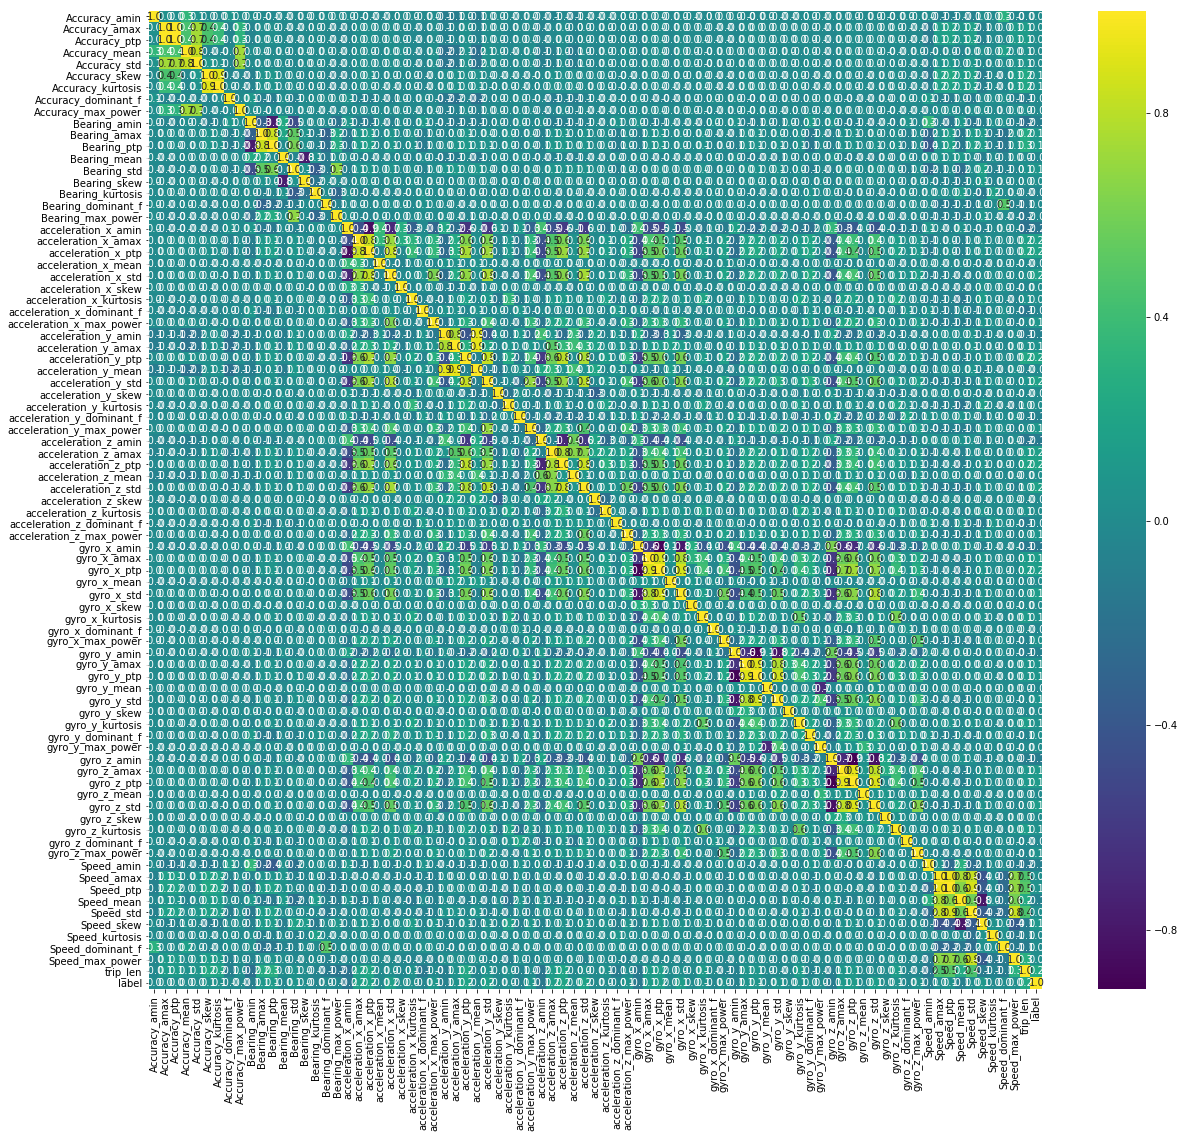

In [6]:
# we look at the correlations between the features using a covariance matrix
plt.figure(figsize=(20, 18))

df_corr_matrix = pd.DataFrame(np.corrcoef(df_engg_feats_labels0.values.T), 
                              index=df_engg_feats_labels0.columns, columns=df_engg_feats_labels0.columns)
# heatmap
sns.heatmap(df_corr_matrix, annot=True, fmt='0.1f', cmap="viridis")

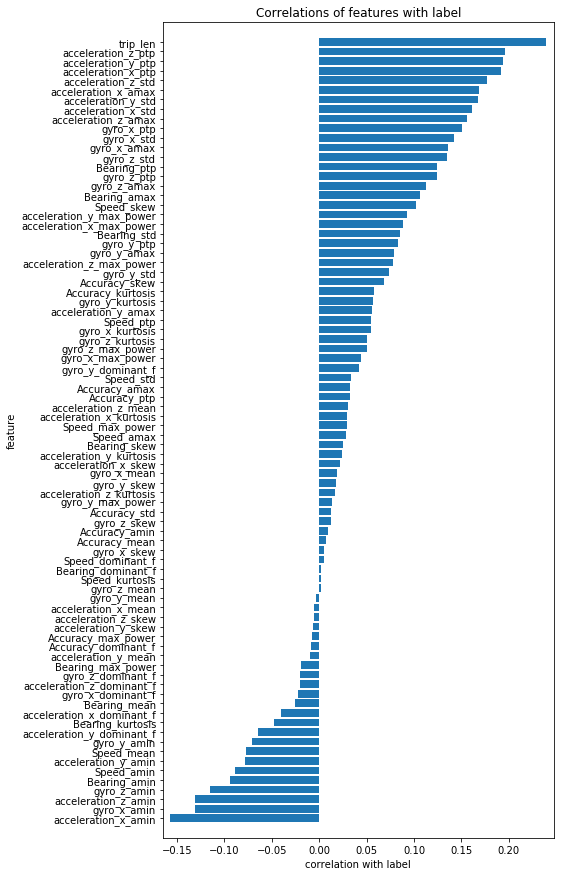

In [9]:
plt.figure(figsize=(7, 15))

# barplot
y = df_corr_matrix.iloc[:, -1].drop("label").values
x = df_corr_matrix.iloc[:, [-1]].drop("label").index
inds = np.argsort(y)
y = y[inds]
x = x[inds]
plt.barh(x, y)
plt.title("Correlations of features with label")
plt.xlabel("correlation with label")
plt.ylabel("feature")
plt.margins(0.02)

Counter({0: 14279, 1: 4737})


Text(0, 0.5, 'counts')

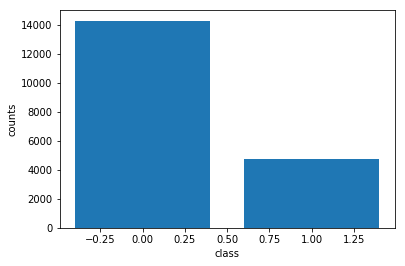

In [10]:
# number of samples per class
print(Counter(df_engg_feats_labels0.label))
y = Counter(df_engg_feats_labels0.label).values()
x = Counter(df_engg_feats_labels0.label).keys()

plt.bar(x, y)
plt.xlabel("class")
plt.ylabel("counts")

## Preprocessing for Models

In [11]:
from sklearn.utils import shuffle

In [12]:
# equalizing the number of classes
# getting number of samples for class 1 (lower)
num_per_class = len(df_engg_feats_labels0[df_engg_feats_labels0.label == 1])
print(num_per_class)

# getting a sample for class 1
df_labels_1 = df_engg_feats_labels0[df_engg_feats_labels0.label == 1].sample(n=num_per_class, replace=False, random_state=42)

# getting a sample for class 0
df_labels_0 = df_engg_feats_labels0[df_engg_feats_labels0.label == 0].sample(n=num_per_class, replace=False, random_state=42)
print(len(df_labels_0))

4737
4737


In [13]:
# concatenate and shuffle
df_for_ml = shuffle(pd.concat([df_labels_1, df_labels_0]), random_state=42).reset_index(drop=True)

# shape
df_for_ml.shape

(9474, 83)

In [14]:
# save
df_for_ml.to_csv("data/processed/df_for_ml.csv", index=False)

In [15]:
# load dataset for machine learning
df_for_ml = pd.read_csv("data/processed/df_for_ml.csv")

Counter({1: 4737, 0: 4737})


Text(0, 0.5, 'counts')

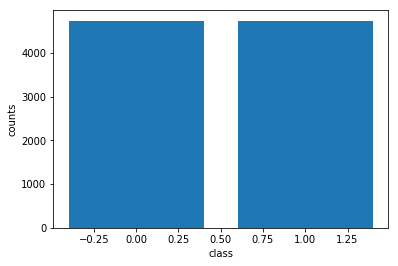

In [16]:
# number of samples per class
print(Counter(df_for_ml.label))
y = Counter(df_for_ml.label).values()
x = Counter(df_for_ml.label).keys()

plt.bar(x, y)
plt.xlabel("class")
plt.ylabel("counts")

In [17]:
# no need for train test splitting since we will be using kfold validation
# we have already set aside a 5% test set above

In [18]:
X_train = df_for_ml.drop("label", axis=1)
y_train = df_for_ml["label"]

In [19]:
X_train.head()

,Accuracy_amin,Accuracy_amax,Accuracy_ptp,Accuracy_mean,Accuracy_std,Accuracy_skew,Accuracy_kurtosis,Accuracy_dominant_f,Accuracy_max_power,Bearing_amin,...,Speed_amin,Speed_amax,Speed_ptp,Speed_mean,Speed_std,Speed_skew,Speed_kurtosis,Speed_dominant_f,Speed_max_power,trip_len
0,3.198,5.5,2.302,3.894792,0.893479,0.814521,-1.091455,0.007937,0.192704,68.000000,...,0.0,17.351286,17.351286,2.504549,4.266055,1.843148,2.462901,0.007937,3.809542,630.0
1,10.000,10.0,0.000,10.000000,0.000000,0.000000,-3.000000,0.500000,0.000000,0.111948,...,0.0,26.559999,26.559999,11.350061,9.052287,0.157259,-1.598451,0.001214,37.976315,824.0
2,3.000,4.6,1.600,3.744292,0.337499,-1.529162,0.906031,0.004167,0.035798,1.000000,...,0.0,16.400080,16.400080,9.447364,4.975110,-0.563249,-0.972619,0.004167,12.533629,240.0
3,3.000,24.0,21.000,4.262047,1.120936,5.060578,54.870297,0.000394,0.100700,0.000000,...,0.0,26.564178,26.564178,15.719868,7.639410,-0.636798,-0.791403,0.000394,38.914546,2535.0
4,3.000,1476.0,1473.000,15.819278,114.035648,10.749030,118.580033,0.002484,261.083307,0.000000,...,-1.0,23.463644,24.463644,7.202245,7.820243,0.586466,-1.179417,0.001242,17.608936,805.0


In [20]:
y_train[:5]

0    1
1    1
2    0
3    1
4    0
Name: label, dtype: int64

In [21]:
# Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mmsc = MinMaxScaler()
stdsc = StandardScaler()

In [22]:
# scale the training set minmax/standard
scaler = "std"

if scaler == "std":
    sc = stdsc.fit(X_train)
elif scaler== "minmax":
    sc = mmsc.fit(X_train)
elif scaler== "minmax2":
    mmsc = MinMaxScaler((-1, 1))
    sc = mmsc.fit(X_train)
    
# save scaler
scalerfile = f'scalers/{scaler}.sav'
pickle.dump(sc, open(scalerfile, 'wb'))

feature_cols = X_train.columns
    
X_train = sc.transform(X_train)
X_train = pd.DataFrame(X_train, columns=feature_cols)

X_train.head()

,Accuracy_amin,Accuracy_amax,Accuracy_ptp,Accuracy_mean,Accuracy_std,Accuracy_skew,Accuracy_kurtosis,Accuracy_dominant_f,Accuracy_max_power,Bearing_amin,...,Speed_amin,Speed_amax,Speed_ptp,Speed_mean,Speed_std,Speed_skew,Speed_kurtosis,Speed_dominant_f,Speed_max_power,trip_len
0,-0.057130,-0.315332,-0.313746,-0.171238,-0.203941,-0.567597,-0.347694,-0.080400,-0.047742,2.173946,...,0.224034,-0.659811,-0.700796,-1.365871,-1.042200,2.200125,1.108945,0.150898,-0.825481,-0.516532
1,0.400207,-0.304713,-0.319185,-0.027475,-0.216655,-0.703817,-0.358395,7.604081,-0.047747,-0.233700,...,0.224034,0.974652,0.899017,0.743365,1.398571,-0.259714,-0.343605,-0.147337,1.018465,-0.103121
2,-0.070443,-0.317456,-0.315404,-0.174782,-0.211853,-0.959554,-0.336495,-0.139273,-0.047746,-0.202205,...,0.224034,-0.828641,-0.866047,0.289662,-0.680613,-1.310990,-0.119775,-0.016336,-0.354651,-1.347617
3,-0.070443,-0.271677,-0.269564,-0.162590,-0.200705,0.142515,-0.033938,-0.198182,-0.047745,-0.237670,...,0.224034,0.975394,0.899743,1.785357,0.678065,-1.418304,-0.054963,-0.183674,1.069100,3.542998
4,-0.070443,3.154658,3.161349,0.109555,1.406018,1.093852,0.323258,-0.165543,-0.041320,-0.237670,...,-0.483969,0.425077,0.534821,-0.245693,0.770282,0.366531,-0.193737,-0.146066,-0.080742,-0.143609


In [23]:
# PCA?
# are there visible clusters if we perform and look at it in 3d?
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents)

In [24]:
len(X_train.columns)

82

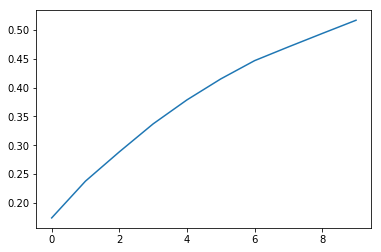

array([0.173779  , 0.23763785, 0.28841297, 0.33700046, 0.37863155,
       0.41503622, 0.44675829, 0.47062473, 0.49391055, 0.51689823])

In [25]:
# explained variance ratio of first 10 principal components
# first 10 principal components explain 80% of the variance
plt.plot(np.cumsum(pca.explained_variance_ratio_[:10]))
plt.show()
np.cumsum(pca.explained_variance_ratio_[:10])

In [26]:
# plot in 3D with label colors
principalDf.iloc[:, 0:3].head()

,0,1,2
0,-1.732378,-2.789072,-0.835939
1,-1.266919,1.172730,0.562421
2,-1.080501,-1.430939,-0.760123
3,-0.117075,2.909555,0.787766
4,-0.786258,2.195776,1.566378


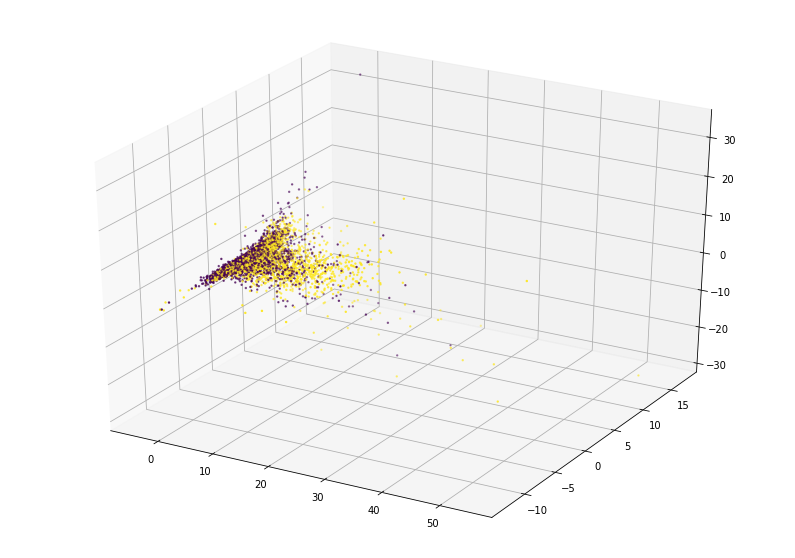

In [27]:
# plotting on the first 3 principal components
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection='3d')

c = y_train
ax.scatter3D(principalDf.iloc[:, 0], principalDf.iloc[:, 1], principalDf.iloc[:, 2], c=c, cmap='viridis', s=2)


## Accuracy to Beat - PCC

In [28]:
# proportional chance criterion
state_counts = Counter(y_train)
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
num = (df_state[0] / df_state[0].sum())**2
pcc = np.round(num.sum(), 2)
pcc

0.5

## Machine Learning Models

In [29]:
models_results = {'model':[], 'valid_acc':[], 'params':[]}

### Logistic Regression

In [30]:
param_grid = {'penalty':['l1', 'l2'], 'C':[0.01, 0.1, 0.5, 0.75, 1., 10, 100]}

clf = LogisticRegression()

logreg = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)
logreg.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=36,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 0.5, 0.75, 1.0, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best validation accuracy: 0.6289845894025755
Best parameters: {'C': 0.1, 'penalty': 'l2'}


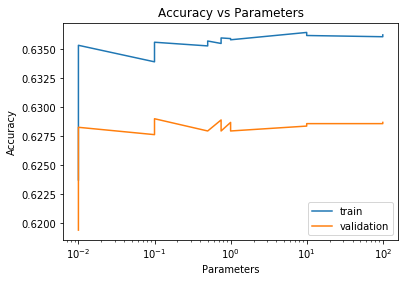

In [31]:
# calculate results
model_name = 'log_reg'
model = logreg
results = pd.DataFrame(model.cv_results_)
params = results.param_C
train_score = results.mean_train_score
valid_score = results.mean_test_score

# plot
plt.semilogx()
plt.plot(params, train_score, label="train")
plt.plot(params, valid_score, label="validation")
plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Parameters")
plt.legend()

# saving to dictionary of models and results
models_results["model"] += [model_name]
models_results["params"] += [model.best_params_]
models_results["valid_acc"] += [model.best_score_]

# print accuracies and parameters
print("Best validation accuracy:", model.best_score_)
print("Best parameters:", model.best_params_)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

# save best_params
file = model.best_params_
filepath = f'results/{model_name}_{scaler}_best_params.sav'
pickle.dump(file, open(filepath, 'wb'))

# save feature importances
file = model.best_estimator_.coef_
filepath = f'results/{model_name}_{scaler}_feature_importances.sav'
pickle.dump(file, open(filepath, 'wb'))

### Linear SVC L1

In [32]:
param_grid = {'penalty':['l1'], 'dual':[False], 'C':[0.01, 0.1, 0.5, 0.75, 1., 10, 100, 1000]}

clf = LinearSVC()

lsvcl1 = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)
lsvcl1.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=36,
       param_grid={'penalty': ['l1'], 'dual': [False], 'C': [0.01, 0.1, 0.5, 0.75, 1.0, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best validation accuracy: 0.629512349588347
Best parameters: {'C': 0.75, 'dual': False, 'penalty': 'l1'}


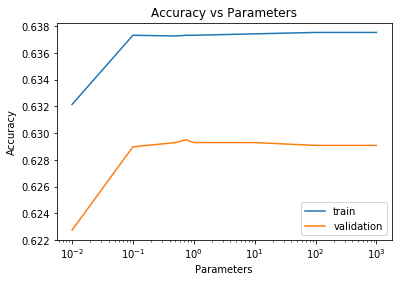

In [33]:
# calculate results
model_name = 'linear_svc_l1'
model = lsvcl1
results = pd.DataFrame(model.cv_results_)
params = results.param_C
train_score = results.mean_train_score
valid_score = results.mean_test_score

# plot
plt.semilogx()
plt.plot(params, train_score, label="train")
plt.plot(params, valid_score, label="validation")
plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Parameters")
plt.legend()

# saving to dictionary of models and results
models_results["model"] += [model_name]
models_results["params"] += [model.best_params_]
models_results["valid_acc"] += [model.best_score_]

# print accuracies and parameters
print("Best validation accuracy:", model.best_score_)
print("Best parameters:", model.best_params_)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

# save best_params
file = model.best_params_
filepath = f'results/{model_name}_{scaler}_best_params.sav'
pickle.dump(file, open(filepath, 'wb'))

# save feature importances
file = model.best_estimator_.coef_
filepath = f'results/{model_name}_{scaler}_feature_importances.sav'
pickle.dump(file, open(filepath, 'wb'))

### Linear SVC L2

In [34]:
param_grid = {'penalty':['l2'], 'loss':['hinge'], 'C':[0.01, 0.1, 0.5, 0.75, 1., 10, 100, 1000]}

clf = LinearSVC()

lsvcl2 = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)
lsvcl2.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=36,
       param_grid={'penalty': ['l2'], 'loss': ['hinge'], 'C': [0.01, 0.1, 0.5, 0.75, 1.0, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best validation accuracy: 0.6284568292168039
Best parameters: {'C': 0.01, 'loss': 'hinge', 'penalty': 'l2'}


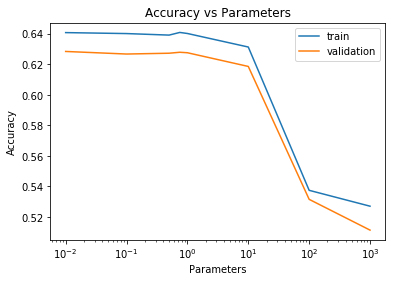

In [35]:
# calculate results
model_name = 'linear_svc_l2'
model = lsvcl2
results = pd.DataFrame(model.cv_results_)
params = results.param_C
train_score = results.mean_train_score
valid_score = results.mean_test_score

# plot
plt.semilogx()
plt.plot(params, train_score, label="train")
plt.plot(params, valid_score, label="validation")
plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Parameters")
plt.legend()

# saving to dictionary of models and results
models_results["model"] += [model_name]
models_results["params"] += [model.best_params_]
models_results["valid_acc"] += [model.best_score_]

# print accuracies and parameters
print("Best validation accuracy:", model.best_score_)
print("Best parameters:", model.best_params_)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

# save best_params
file = model.best_params_
filepath = f'results/{model_name}_{scaler}_best_params.sav'
pickle.dump(file, open(filepath, 'wb'))

# save feature importances
file = model.best_estimator_.coef_
filepath = f'results/{model_name}_{scaler}_feature_importances.sav'
pickle.dump(file, open(filepath, 'wb'))

### Nonlinear SVC

In [36]:
param_grid = {'C':[0.1, 0.5, 0.75, 1., 10, 100, 1000, 2000]}

clf = SVC()

svc = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)
svc.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=36,
       param_grid={'C': [0.1, 0.5, 0.75, 1.0, 10, 100, 1000, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best validation accuracy: 0.6266624445851805
Best parameters: {'C': 1.0}


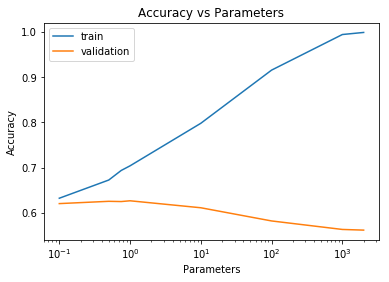

In [37]:
# calculate results
model_name = 'svc'
model = svc
results = pd.DataFrame(model.cv_results_)
params = results.param_C
train_score = results.mean_train_score
valid_score = results.mean_test_score

# plot
plt.semilogx()
plt.plot(params, train_score, label="train")
plt.plot(params, valid_score, label="validation")
plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Parameters")
plt.legend()

# saving to dictionary of models and results
models_results["model"] += [model_name]
models_results["params"] += [model.best_params_]
models_results["valid_acc"] += [model.best_score_]

# print accuracies and parameters
print("Best validation accuracy:", model.best_score_)
print("Best parameters:", model.best_params_)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

# save best_params
file = model.best_params_
filepath = f'results/{model_name}_{scaler}_best_params.sav'
pickle.dump(file, open(filepath, 'wb'))

### GBM

In [38]:
param_grid = {'learning_rate':[0.01, 0.05, 0.1], "n_estimators":[500], "max_depth":[2, 3, 4, 5]}

clf = GradientBoostingClassifier()

gbm = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)
gbm.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=36,
       param_grid={'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [500], 'max_depth': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best validation accuracy: 0.6307789740341989
Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}


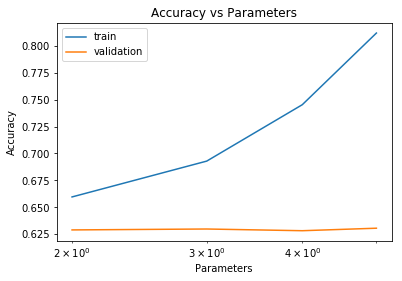

In [39]:
# calculate results
model_name = 'gbm'
model = gbm
results = pd.DataFrame(model.cv_results_)
params = results[results.param_learning_rate==0.01].param_max_depth
train_score = results[results.param_learning_rate==0.01].mean_train_score
valid_score = results[results.param_learning_rate==0.01].mean_test_score

# plot
plt.semilogx()
plt.plot(params, train_score, label="train")
plt.plot(params, valid_score, label="validation")
plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Parameters")
plt.legend()

# saving to dictionary of models and results
models_results["model"] += [model_name]
models_results["params"] += [model.best_params_]
models_results["valid_acc"] += [model.best_score_]

# print accuracies and parameters
print("Best validation accuracy:", model.best_score_)
print("Best parameters:", model.best_params_)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

# save best_params
file = model.best_params_
filepath = f'results/{model_name}_{scaler}_best_params.sav'
pickle.dump(file, open(filepath, 'wb'))

# save feature importances
file = model.best_estimator_.feature_importances_
filepath = f'results/{model_name}_{scaler}_feature_importances.sav'
pickle.dump(file, open(filepath, 'wb'))

### Random Forest

In [40]:
param_grid = {'min_samples_split':[2, 3, 4], "max_depth":[2, 3, 4, 5]}

clf = RandomForestClassifier()

rf = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)
rf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=36,
       param_grid={'min_samples_split': [2, 3, 4], 'max_depth': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best validation accuracy: 0.6200126662444585
Best parameters: {'max_depth': 3, 'min_samples_split': 4}


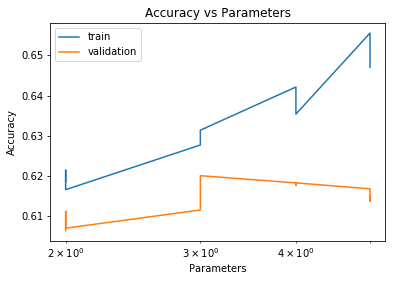

In [41]:
# calculate results
model_name = 'rf'
model = rf
results = pd.DataFrame(model.cv_results_)
params = results.param_max_depth
train_score = results.mean_train_score
valid_score = results.mean_test_score

# plot
plt.semilogx()
plt.plot(params, train_score, label="train")
plt.plot(params, valid_score, label="validation")
plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Parameters")
plt.legend()

# saving to dictionary of models and results
models_results["model"] += [model_name]
models_results["params"] += [model.best_params_]
models_results["valid_acc"] += [model.best_score_]

# print accuracies and parameters
print("Best validation accuracy:", model.best_score_)
print("Best parameters:", model.best_params_)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

# save best_params
file = model.best_params_
filepath = f'results/{model_name}_{scaler}_best_params.sav'
pickle.dump(file, open(filepath, 'wb'))

# save feature importances
file = model.best_estimator_.feature_importances_
filepath = f'results/{model_name}_{scaler}_feature_importances.sav'
pickle.dump(file, open(filepath, 'wb'))

### Decision Tree

In [42]:
param_grid = {'min_samples_split':[2, 3, 4], "max_depth":[2, 3, 4, 5]}

clf = DecisionTreeClassifier()

dt = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)
dt.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=36,
       param_grid={'min_samples_split': [2, 3, 4], 'max_depth': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best validation accuracy: 0.6027021321511505
Best parameters: {'max_depth': 2, 'min_samples_split': 2}


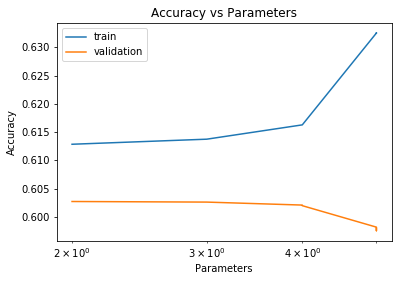

In [43]:
# calculate results
model_name = 'dt'
model = dt
results = pd.DataFrame(model.cv_results_)
params = results.param_max_depth
train_score = results.mean_train_score
valid_score = results.mean_test_score

# plot
plt.semilogx()
plt.plot(params, train_score, label="train")
plt.plot(params, valid_score, label="validation")
plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Parameters")
plt.legend()

# saving to dictionary of models and results
models_results["model"] += [model_name]
models_results["params"] += [model.best_params_]
models_results["valid_acc"] += [model.best_score_]

# print accuracies and parameters
print("Best validation accuracy:", model.best_score_)
print("Best parameters:", model.best_params_)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

# save best_params
file = model.best_params_
filepath = f'results/{model_name}_{scaler}_best_params.sav'
pickle.dump(file, open(filepath, 'wb'))

# save feature importances
file = model.best_estimator_.feature_importances_
filepath = f'results/{model_name}_{scaler}_feature_importances.sav'
pickle.dump(file, open(filepath, 'wb'))

### Naive Bayes

In [44]:
param_grid = {'var_smoothing':[1e-9, 1e-5, 1e-1]}
clf = GaussianNB()

nb = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)
nb.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GaussianNB(priors=None, var_smoothing=1e-09),
       fit_params=None, iid='warn', n_jobs=36,
       param_grid={'var_smoothing': [1e-09, 1e-05, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best validation accuracy: 0.5483428330166772
Best parameters: {'var_smoothing': 1e-09}


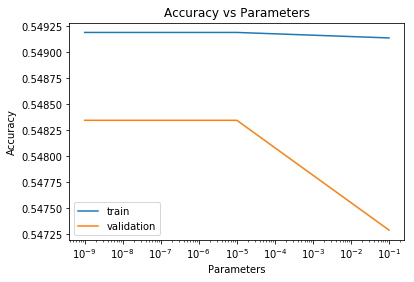

In [45]:
# calculate results
model_name = 'nb'
model = nb
results = pd.DataFrame(model.cv_results_)
params = results.param_var_smoothing
train_score = results.mean_train_score
valid_score = results.mean_test_score

# plot
plt.semilogx()
plt.plot(params, train_score, label="train")
plt.plot(params, valid_score, label="validation")
plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Parameters")
plt.legend()

# saving to dictionary of models and results
models_results["model"] += [model_name]
models_results["params"] += [model.best_params_]
models_results["valid_acc"] += [model.best_score_]

# print accuracies and parameters
print("Best validation accuracy:", model.best_score_)
print("Best parameters:", model.best_params_)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

# save best_params
file = model.best_params_
filepath = f'results/{model_name}_{scaler}_best_params.sav'
pickle.dump(file, open(filepath, 'wb'))

In [46]:
results = pd.DataFrame(models_results).sort_values(by="valid_acc", ascending=False)
results.drop_duplicates(subset="valid_acc", inplace=True)

In [47]:
# save to csv
results.to_csv(f"results/ml_results_{scaler}_pcc-{pcc}_.csv", index=False)

In [50]:
# results from standard scaler
pd.set_option('display.max_colwidth', -1)
pd.read_csv("results/ml_results_std_pcc-0.5_.csv").drop_duplicates(subset="model")

,model,valid_acc,params
0,gbm,0.630779,"{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}"
1,linear_svc_l1,0.629512,"{'C': 0.75, 'dual': False, 'penalty': 'l1'}"
2,log_reg,0.628985,"{'C': 0.1, 'penalty': 'l2'}"
3,linear_svc_l2,0.628457,"{'C': 0.01, 'loss': 'hinge', 'penalty': 'l2'}"
4,svc,0.626662,{'C': 1.0}
5,rf,0.620013,"{'max_depth': 3, 'min_samples_split': 4}"
6,dt,0.602702,"{'max_depth': 2, 'min_samples_split': 2}"
7,nb,0.548343,{'var_smoothing': 1e-09}


In [49]:
# # results from minmax scaler
# pd.set_option('display.max_colwidth', -1)
# pd.read_csv("results/ml_results_minmax_pcc-0.5_.csv").drop_duplicates(subset="model")

### Most Predictive Features According to the Best ML Model

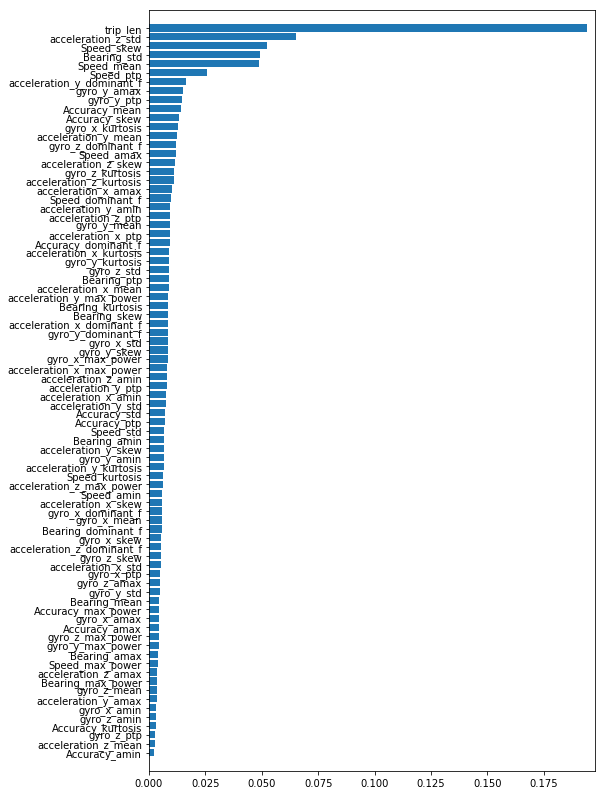

In [51]:
# GBM can be used for feature importances
filepath = f'results/gbm_{scaler}_feature_importances.sav'
feature_importances = pickle.load(open(filepath, 'rb')).flatten()

plt.figure(figsize=(8, 14))
y = feature_importances
inds = np.argsort(y)
y = y[inds]
x = feature_cols[inds]
plt.barh(x, y)
plt.margins(0.02)

## Incremental Adding of Features from Most Predictive

In [273]:
models_results_b = {"features":[], "model":[], "params":[], "valid_acc":[]}

In [274]:
# feats from most important down
top_feats = x[::-1]
top_feats

Index(['trip_len', 'acceleration_z_std', 'Speed_skew', 'Bearing_std',
       'Speed_mean', 'Speed_ptp', 'gyro_y_ptp', 'acceleration_x_ptp',
       'gyro_y_amax', 'Speed_dominant_f', 'Accuracy_skew', 'gyro_x_max_power',
       'gyro_z_std', 'Speed_amax', 'Accuracy_mean', 'gyro_y_kurtosis',
       'acceleration_y_dominant_f', 'acceleration_x_amax',
       'acceleration_y_std', 'acceleration_z_ptp', 'gyro_x_kurtosis',
       'Accuracy_amax', 'Accuracy_ptp', 'acceleration_z_skew',
       'gyro_z_kurtosis', 'acceleration_y_mean', 'acceleration_y_ptp',
       'gyro_x_ptp', 'gyro_x_std', 'gyro_y_mean', 'gyro_y_amin', 'Speed_amin',
       'Bearing_ptp', 'acceleration_y_max_power', 'Speed_kurtosis',
       'Accuracy_dominant_f', 'acceleration_x_max_power', 'Accuracy_std',
       'Bearing_amin', 'gyro_z_skew', 'acceleration_z_kurtosis',
       'acceleration_x_kurtosis', 'acceleration_x_std', 'gyro_z_dominant_f',
       'gyro_y_std', 'acceleration_x_amin', 'acceleration_x_mean',
       'gyro_x_me

### Nonlinear SVC

In [276]:
param_path = f"results/svc_{scaler}_best_params.sav"
best_params = pickle.load(open(param_path, 'rb'))
param_grid = {k:[v] for k, v in best_params.items()}

clf = SVC()
svc_b = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)

valid_accs = []
feats_b = []
best_score = 0

model = svc_b
model_name = 'svc_b'

# checking features one by one
for i in range(len(top_feats)):
    feats_b += [top_feats[i]]
    X_train_b = X_train[feats_b]

    model.fit(X_train_b, y_train)

    # calculate results
    results = pd.DataFrame(model.cv_results_)
    valid_score = results.mean_test_score.values[0]

    if valid_score > best_score:
        best_score = valid_score
        valid_accs.append(valid_score)

        # print accuracies and parameters
        print("Best validation accuracy:", best_score)
        
    else:
        feats_b = feats_b[:-1]

models_results_b["features"] += [feats_b]
models_results_b["model"] += [model_name]
models_results_b["params"] += [model.best_params_]
models_results_b["valid_acc"] += [best_score] 
            
X_train_b = X_train[feats_b]
model.fit(X_train_b, y_train)
print(feats_b)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

Best validation accuracy: 0.5949968334388853
Best validation accuracy: 0.6124129195693477
Best validation accuracy: 0.6202237703187672
Best validation accuracy: 0.6205404264302301
Best validation accuracy: 0.6222292590246992
Best validation accuracy: 0.6287734853282668
Best validation accuracy: 0.6291956934768841
Best validation accuracy: 0.6305678699598902
Best validation accuracy: 0.6310956301456618
Best validation accuracy: 0.6327844627401309
Best validation accuracy: 0.634156639223137
Best validation accuracy: 0.6346843994089086
Best validation accuracy: 0.6354232636689888
Best validation accuracy: 0.6363732320033777
Best validation accuracy: 0.6370065442263035
Best validation accuracy: 0.6373232003377666
Best validation accuracy: 0.6378509605235381
['trip_len', 'acceleration_z_std', 'Speed_skew', 'Bearing_std', 'Speed_mean', 'Speed_ptp', 'gyro_y_amax', 'Accuracy_mean', 'acceleration_x_amax', 'acceleration_z_ptp', 'acceleration_y_mean', 'Accuracy_dominant_f', 'acceleration_z_kurtos

### GBM

In [275]:
param_path = f"results/gbm_{scaler}_best_params.sav"
best_params = pickle.load(open(param_path, 'rb'))
param_grid = {k:[v] for k, v in best_params.items()}

clf = GradientBoostingClassifier()

gbm_b = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)

valid_accs = []
feats_b = []
best_score = 0

model = gbm_b
model_name = 'gbm_b'

# checking features one by one
for i in range(len(top_feats)):
    feats_b += [top_feats[i]]
    X_train_b = X_train[feats_b]

    model.fit(X_train_b, y_train)

    # calculate results
    results = pd.DataFrame(model.cv_results_)
    valid_score = results.mean_test_score.values[0]

    if valid_score > best_score:
        best_score = valid_score
        valid_accs.append(valid_score)

        # print accuracies and parameters
        print("Best validation accuracy:", best_score)
        
    else:
        feats_b = feats_b[:-1]

models_results_b["features"] += [feats_b]
models_results_b["model"] += [model_name]
models_results_b["params"] += [model.best_params_]
models_results_b["valid_acc"] += [best_score] 
       
X_train_b = X_train[feats_b]
model.fit(X_train_b, y_train)
print(feats_b)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

Best validation accuracy: 0.5903525438040954
Best validation accuracy: 0.608190838083175
Best validation accuracy: 0.6186404897614524
Best validation accuracy: 0.6244458518049398
Best validation accuracy: 0.6299345577369643
Best validation accuracy: 0.6316233903314334
Best validation accuracy: 0.6331011188515938
Best validation accuracy: 0.6354232636689888
Best validation accuracy: 0.6355288157061432
Best validation accuracy: 0.6372176483006122
Best validation accuracy: 0.6381676166350011
Best validation accuracy: 0.6388009288579269
Best validation accuracy: 0.6389064808950813
['trip_len', 'acceleration_z_std', 'Speed_skew', 'Bearing_std', 'Speed_ptp', 'gyro_y_ptp', 'Accuracy_mean', 'gyro_y_kurtosis', 'acceleration_y_std', 'gyro_x_kurtosis', 'gyro_y_mean', 'gyro_y_amin', 'Speed_kurtosis']


In [277]:
results_b = pd.DataFrame(models_results_b).sort_values(by="valid_acc", ascending=False)
results_b.iloc[:, 1:]

,model,params,valid_acc
0,gbm_b,"{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}",0.638906
1,svc_b,{'C': 1.0},0.637851


In [278]:
# save to csv
results_b.drop_duplicates("model").to_csv(f"results/ml_results_b_{scaler}.csv", index=False)

In [279]:
pd.read_csv("results/ml_results_b_std.csv")

,features,model,params,valid_acc
0,"['trip_len', 'acceleration_z_std', 'Speed_skew', 'Bearing_std', 'Speed_ptp', 'gyro_y_ptp', 'Accuracy_mean', 'gyro_y_kurtosis', 'acceleration_y_std', 'gyro_x_kurtosis', 'gyro_y_mean', 'gyro_y_amin', 'Speed_kurtosis']",gbm_b,"{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}",0.638906
1,"['trip_len', 'acceleration_z_std', 'Speed_skew', 'Bearing_std', 'Speed_mean', 'Speed_ptp', 'gyro_y_amax', 'Accuracy_mean', 'acceleration_x_amax', 'acceleration_z_ptp', 'acceleration_y_mean', 'Accuracy_dominant_f', 'acceleration_z_kurtosis', 'acceleration_x_amin', 'acceleration_y_skew', 'Speed_std', 'acceleration_y_amax']",svc_b,{'C': 1.0},0.637851


In [280]:
pd.read_csv("results/ml_results_b_minmax.csv")

,features,model,params,valid_acc
0,"['trip_len', 'acceleration_z_std', 'Speed_skew', 'Speed_mean', 'Speed_ptp', 'gyro_y_amax', 'Accuracy_skew', 'gyro_y_kurtosis', 'Speed_amin', 'Accuracy_dominant_f', 'Bearing_amin', 'gyro_z_dominant_f']",gbm_b,"{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}",0.637323
1,"['trip_len', 'acceleration_z_std', 'Speed_skew', 'Speed_ptp', 'gyro_y_ptp', 'Speed_dominant_f', 'Accuracy_skew', 'gyro_x_max_power', 'Speed_amax', 'Accuracy_amax', 'acceleration_z_ptp', 'Speed_std', 'acceleration_z_amin', 'gyro_x_skew', 'Bearing_kurtosis', 'Bearing_dominant_f']",svc_b,{'C': 1000},0.635634
2,"['trip_len', 'acceleration_z_std', 'Speed_skew', 'acceleration_x_ptp', 'Speed_dominant_f', 'Speed_amax', 'gyro_y_kurtosis', 'Accuracy_ptp']",linear_svc_l2_b,"{'C': 0.75, 'loss': 'hinge', 'penalty': 'l2'}",0.623813


In [281]:
pd.read_csv("results/ml_results_b_minmax2.csv")

,features,model,params,valid_acc
0,"['trip_len', 'Bearing_std', 'acceleration_z_std', 'Speed_skew', 'Speed_ptp', 'gyro_y_ptp', 'gyro_y_amax', 'Accuracy_amax', 'gyro_x_ptp', 'gyro_x_mean', 'Speed_kurtosis']",gbm_b,"{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500}",0.635951
1,"['trip_len', 'Bearing_std', 'acceleration_z_std', 'Speed_skew', 'Speed_ptp', 'gyro_y_ptp', 'gyro_y_amax', 'acceleration_z_ptp', 'Speed_amax', 'acceleration_y_std', 'Bearing_ptp', 'gyro_y_std', 'gyro_x_mean', 'acceleration_z_skew', 'acceleration_x_kurtosis', 'Accuracy_amin']",svc_b,{'C': 100},0.632362
2,"['trip_len', 'Bearing_std', 'acceleration_z_std', 'Speed_skew', 'Speed_mean', 'Speed_ptp', 'gyro_z_std', 'gyro_y_kurtosis', 'Accuracy_mean', 'gyro_y_mean', 'gyro_z_amin', 'Bearing_kurtosis', 'acceleration_y_skew', 'gyro_z_ptp', 'acceleration_x_skew', 'Accuracy_amin']",linear_svc_l2_b,"{'C': 0.5, 'loss': 'hinge', 'penalty': 'l2'}",0.626029


## Neural Networks

In [52]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

seed = 42
np.random.seed(seed)

Using TensorFlow backend.


In [53]:

# model
def mlp_class(input_dim, optimizer='adam', activation='relu', dropout=0.1):
    """
    Takes in optimizer, activation, input dimensions, and dropout rate, define a deep learning classifier and returns the trained model
    """
    # create model
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(128, activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(64, activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [58]:
# Grid search
# evaluate model with standardized dataset
classifier = KerasClassifier(build_fn=mlp_class, epochs=10, batch_size=5, verbose=0, optimizer="adam", activation="relu")
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

# grid search
parameters = {
            'input_dim':[X_train.shape[1]],
            'batch_size': [5],
          'epochs': [10],
          'optimizer': ['adam'],
             'activation':['relu'],
             'dropout':[0, 0.1, 0.2, 0.3, 0.4, 0.5]}
model = GridSearchCV(estimator = classifier,
                       param_grid = parameters,
                       scoring = 'accuracy',
                       cv = 3, n_jobs=n_jobs)

model = model.fit(X_train, y_train)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [59]:
results = pd.DataFrame(model.cv_results_)
valid_score = results.mean_test_score.values[0]
valid_score

0.595207937513194

In [60]:
# saving to dictionary of models and results
model_name = "nn"
models_results["model"] += [model_name]
models_results["params"] += [model.best_params_]
models_results["valid_acc"] += [model.best_score_]

In [61]:
results = pd.DataFrame(models_results).sort_values(by="valid_acc", ascending=False)
results.drop_duplicates(subset="valid_acc", inplace=True)
results

,model,valid_acc,params
4,gbm,0.630779,"{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}"
1,linear_svc_l1,0.629512,"{'C': 0.75, 'dual': False, 'penalty': 'l1'}"
0,log_reg,0.628985,"{'C': 0.1, 'penalty': 'l2'}"
2,linear_svc_l2,0.628457,"{'C': 0.01, 'loss': 'hinge', 'penalty': 'l2'}"
3,svc,0.626662,{'C': 1.0}
8,nn,0.623285,"{'activation': 'relu', 'batch_size': 5, 'dropout': 0.5, 'epochs': 10, 'input_dim': 82, 'optimizer': 'adam'}"
5,rf,0.620013,"{'max_depth': 3, 'min_samples_split': 4}"
6,dt,0.602702,"{'max_depth': 2, 'min_samples_split': 2}"
7,nb,0.548343,{'var_smoothing': 1e-09}


In [62]:
# save to csv
results.to_csv(f"results/ml_results_{scaler}_pcc-{pcc}_with-nn.csv", index=False)

In [238]:
# # {'batch_size': 5, 'epochs': 10, 'optimizer': 'adam'}
# grid_search.best_params_

In [63]:
# continue training with the best params
optimizer = "adam"
activation = "relu"
dropout = 0.5
input_dim = X_train.shape[1]
model = mlp_class(input_dim=input_dim, optimizer=optimizer, activation=activation, dropout=dropout)

In [64]:
# checkpoint
filepath = f"models/mlp_{scaler}_{activation}_{optimizer}_dropout-{dropout}_cols-{input_dim}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [65]:
model.fit(X_train, y_train, validation_split=0.33, batch_size=5, epochs=30, callbacks=callbacks_list)

Train on 6347 samples, validate on 3127 samples
Epoch 1/100
6347/6347 [==============================] - 6s 978us/step - loss: 0.6998 - acc: 0.5582 - val_loss: 0.6529 - val_acc: 0.6207

Epoch 00001: val_acc improved from -inf to 0.62072, saving model to models/mlp_std_relu_adam_dropout-0.5_cols-82.hdf5
Epoch 2/100
6347/6347 [==============================] - 5s 831us/step - loss: 0.6560 - acc: 0.6028 - val_loss: 0.6420 - val_acc: 0.6140

Epoch 00002: val_acc did not improve from 0.62072
Epoch 3/100
6347/6347 [==============================] - 6s 876us/step - loss: 0.6456 - acc: 0.6127 - val_loss: 0.6341 - val_acc: 0.6255

Epoch 00003: val_acc improved from 0.62072 to 0.62552, saving model to models/mlp_std_relu_adam_dropout-0.5_cols-82.hdf5
Epoch 4/100
6347/6347 [==============================] - 6s 907us/step - loss: 0.6407 - acc: 0.6198 - val_loss: 0.6283 - val_acc: 0.6220

Epoch 00004: val_acc did not improve from 0.62552
Epoch 5/100
6347/6347 [==============================] - 7s 1

6347/6347 [==============================] - 5s 822us/step - loss: 0.6003 - acc: 0.6576 - val_loss: 0.6419 - val_acc: 0.6226

Epoch 00042: val_acc did not improve from 0.63064
Epoch 43/100
6347/6347 [==============================] - 5s 821us/step - loss: 0.5961 - acc: 0.6668 - val_loss: 0.6406 - val_acc: 0.6044

Epoch 00043: val_acc did not improve from 0.63064
Epoch 44/100
6347/6347 [==============================] - 5s 832us/step - loss: 0.5907 - acc: 0.6698 - val_loss: 0.6466 - val_acc: 0.6191

Epoch 00044: val_acc did not improve from 0.63064
Epoch 45/100
6347/6347 [==============================] - 5s 824us/step - loss: 0.5827 - acc: 0.6710 - val_loss: 0.6562 - val_acc: 0.6204

Epoch 00045: val_acc did not improve from 0.63064
Epoch 46/100
6347/6347 [==============================] - 5s 823us/step - loss: 0.5872 - acc: 0.6677 - val_loss: 0.6627 - val_acc: 0.6194

Epoch 00046: val_acc did not improve from 0.63064
Epoch 47/100
6347/6347 [==============================] - 5s 822us/s

6347/6347 [==============================] - 5s 828us/step - loss: 0.5669 - acc: 0.6980 - val_loss: 0.6989 - val_acc: 0.6067

Epoch 00085: val_acc did not improve from 0.63064
Epoch 86/100
6347/6347 [==============================] - 5s 827us/step - loss: 0.5557 - acc: 0.6980 - val_loss: 0.6861 - val_acc: 0.6025

Epoch 00086: val_acc did not improve from 0.63064
Epoch 87/100
6347/6347 [==============================] - 6s 887us/step - loss: 0.5638 - acc: 0.6943 - val_loss: 0.6700 - val_acc: 0.6019

Epoch 00087: val_acc did not improve from 0.63064
Epoch 88/100
6347/6347 [==============================] - 7s 1ms/step - loss: 0.5515 - acc: 0.6995 - val_loss: 0.6964 - val_acc: 0.6031

Epoch 00088: val_acc did not improve from 0.63064
Epoch 89/100
6347/6347 [==============================] - 5s 820us/step - loss: 0.5519 - acc: 0.6991 - val_loss: 0.6848 - val_acc: 0.5859

Epoch 00089: val_acc did not improve from 0.63064
Epoch 90/100
6347/6347 [==============================] - 5s 821us/ste

In [ ]:
# Grid search
# evaluate model with standardized dataset
classifier = KerasClassifier(build_fn=mlp_class, epochs=10, batch_size=5, verbose=0, optimizer="adam", activation="relu")
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

# grid search
parameters = {
            'input_dim':[X_train.shape[1]],
            'batch_size': [5],
          'epochs': [30],
          'optimizer': ['adam'],
             'activation':['relu'],
             'dropout':[0.5]}
model = GridSearchCV(estimator = classifier,
                       param_grid = parameters,
                       scoring = 'accuracy',
                       cv = 3, n_jobs=n_jobs)

model = model.fit(X_train, y_train)


In [ ]:
results = pd.DataFrame(model.cv_results_)
valid_score = results.mean_test_score.values[0]
valid_score

In [ ]:
# saving to dictionary of models and results
model_name = "nn_30_epochs"
models_results["model"] += [model_name]
models_results["params"] += [model.best_params_]
models_results["valid_acc"] += [model.best_score_]

In [ ]:
results = pd.DataFrame(models_results).sort_values(by="valid_acc", ascending=False)
results.drop_duplicates(subset="valid_acc", inplace=True)
results

In [ ]:
# save to csv
results.to_csv(f"results/ml_results_{scaler}_pcc-{pcc}_with-nn.csv", index=False)

### Selecting Features Identified by GBM above

In [283]:
# Selecting certain features
results = pd.read_csv(f"results/ml_results_b_{scaler}.csv")
cols = ast.literal_eval(results[results.model=="gbm_b"].features.values[0])

In [284]:
X_train_b = X_train[cols]
X_train_b.shape

(9474, 13)

In [285]:
# continue training with the best params
optimizer = optimizer
activation = activation
dropout = dropout
input_dim = X_train_b.shape[1]
model = mlp_class(input_dim=input_dim, optimizer=optimizer, activation=activation, dropout=dropout)

In [286]:
# checkpoint
filepath = f"models/mlp_{scaler}_{activation}_{optimizer}_dropout-{dropout}_cols-{input_dim}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [287]:
model.fit(X_train_b, y_train, validation_split=0.33, batch_size=5, epochs=100, callbacks=callbacks_list)

Train on 6347 samples, validate on 3127 samples
Epoch 1/100
6347/6347 [==============================] - 8s 1ms/step - loss: 0.7266 - acc: 0.5489 - val_loss: 0.6603 - val_acc: 0.6169

Epoch 00001: val_acc improved from -inf to 0.61689, saving model to models/mlp_std_relu_adam_dropout-0.7_cols-13.hdf5
Epoch 2/100
6347/6347 [==============================] - 6s 908us/step - loss: 0.6708 - acc: 0.5967 - val_loss: 0.6430 - val_acc: 0.6233

Epoch 00002: val_acc improved from 0.61689 to 0.62328, saving model to models/mlp_std_relu_adam_dropout-0.7_cols-13.hdf5
Epoch 3/100
6347/6347 [==============================] - 6s 913us/step - loss: 0.6638 - acc: 0.5959 - val_loss: 0.6410 - val_acc: 0.6207

Epoch 00003: val_acc did not improve from 0.62328
Epoch 4/100
6347/6347 [==============================] - 6s 904us/step - loss: 0.6548 - acc: 0.6091 - val_loss: 0.6318 - val_acc: 0.6198

Epoch 00004: val_acc did not improve from 0.62328
Epoch 5/100
6347/6347 [==============================] - 6s 906

6347/6347 [==============================] - 6s 907us/step - loss: 0.6501 - acc: 0.6277 - val_loss: 0.6364 - val_acc: 0.6194

Epoch 00085: val_acc did not improve from 0.62744
Epoch 86/100
6347/6347 [==============================] - 6s 908us/step - loss: 0.6315 - acc: 0.6401 - val_loss: 0.6453 - val_acc: 0.6079

Epoch 00086: val_acc did not improve from 0.62744
Epoch 87/100
6347/6347 [==============================] - 6s 903us/step - loss: 0.6468 - acc: 0.6234 - val_loss: 0.6359 - val_acc: 0.6175

Epoch 00087: val_acc did not improve from 0.62744
Epoch 88/100
6347/6347 [==============================] - 6s 903us/step - loss: 0.6393 - acc: 0.6308 - val_loss: 0.6407 - val_acc: 0.6207

Epoch 00088: val_acc did not improve from 0.62744
Epoch 89/100
6347/6347 [==============================] - 6s 906us/step - loss: 0.6353 - acc: 0.6405 - val_loss: 0.6384 - val_acc: 0.6204

Epoch 00089: val_acc did not improve from 0.62744
Epoch 90/100
6347/6347 [==============================] - 6s 904us/s